# SVM (Support Vector Machine)

- 장점 : 중소규모의 비선형 데이터 셋에 효과적 
- 단점 : 큰 데이터 셋에서 사용하기 어려움 


---

# 1. 선형 SVM 분류 

## 1) 라지 마진 분류 
- SVM 분류기 : `분류`를 하기 위한 분류 
- `마진` : SVM `분류기`의 폭 
- `서포트 벡터` : 마진을 결정하는 샘플 

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

- 선형 분류 : 결정 경계가 제대로 분류를 못하고 있음 
    - 결정 경계가 샘플과 너무 가까움 -> 제대로 분류하지 못함 

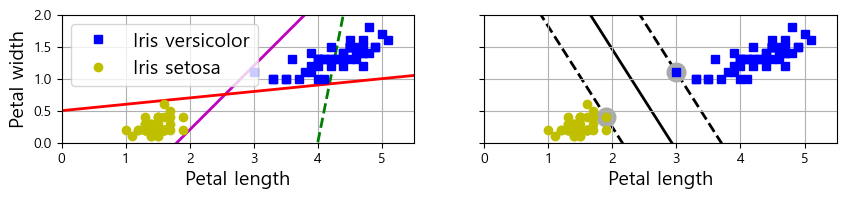

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X, y)

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

\* 주의 사항 : SVM은 특성의 스케일에 민감

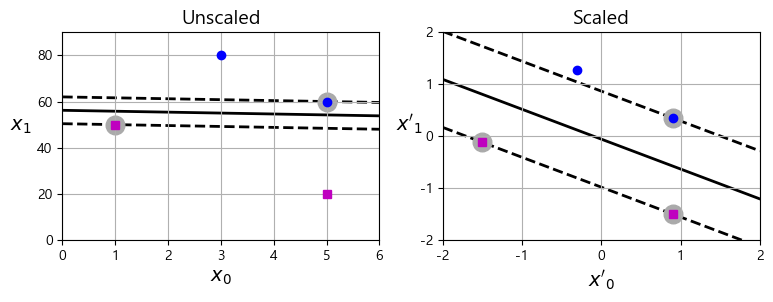

In [3]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()
plt.show()

## 2) 소프트 마진 분류 
### 하드 마진 분류 
> 모든 샘플이 마진 바깥으로 올바르게 분류되어 있어야함 

#### 하드 마진 분류의 문제 
- 데이터가 `선형`적이여야만 함 
- `이상치`에 민감함 

### 소프트 마진 분류의 정의 
> `마진 오류`와 마진의 폭을 최대한 넓게 유지하는 것 사이 균형을 잡은 유연한 모델 
- `마진 오류` : 샘플이 분류기 중간 혹은 반대 쪽에 있는 경우 


- 예시 : 선형 SVM을 이용해 붓꽃 타겟 2 (Iris-Virginica) 맞추기 
  - 사이킷런 버전 1.5 부터 `dual`의 default 값이 `auto`로 변경 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

### 붓꽃 데이터를 Dataframe으로 생성 
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) 

### 정규화 + 선형 SVM 생성
### dual의 기본값이 True에서 auto로 변경 -> 명시적으로 True로 변경 
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))

### 학습 진행 
svm_clf.fit(X, y)

## # 예측 실행  - 2번 타겟인지 확인 
X _new = [[5.5, 1.7], [5.0, 1.5]]
 print("예측 값 : ", svm_clf.predict(X_new))

예측 값 :  [ True False]


####  예측에 사용한 점수
- 샘플과 결정 경계 사이의 거리 
- `LinearSVC` 클래스는 `predicct_proba()` 매서드가 없음 
  - 단, `SVC` 클래스에는 `probability=True`로 설정해서 추정확률을 위한 학습을 추가적으로 진행 -> 훈련 속도가 느려짐 
    - 대신 `predict_proba() 및 predict_log_proba()` 사용 가능 

In [ ]:
print("결정 경계와의 거리 : ",svm_clf.decision_function(X_new))

결정 경계와의 거리 :  [ 0.66163411 -0.22036063]


#### 사이킷런의 SVM 구현 
- 사이킷 런에서 SVM 모델 생성 시, 규제 하이퍼파라미터 `C`를 포함한 여러 파라미터 지정 가능 
  - 규제 `C` 감소 : 마진(도로의 폭)이 커짐 -> `마진 오류` 상승 
  -> 과도하게 훈련세트에 가깝지 않아짐 -> `과대 적합` 위험 감소 
  \* 너무 많이 줄이면 오히려 `과소 적합` 


- 예시 `C=100` 모델과 `C=1` 모델 비교
  - C=1이 일반화가 잘됨 

C:\Users\skssk\AppData\Local\Temp\ipykernel_24612\2398327403.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
C:\Users\skssk\AppData\Local\Temp\ipykernel_24612\2398327403.py:24: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


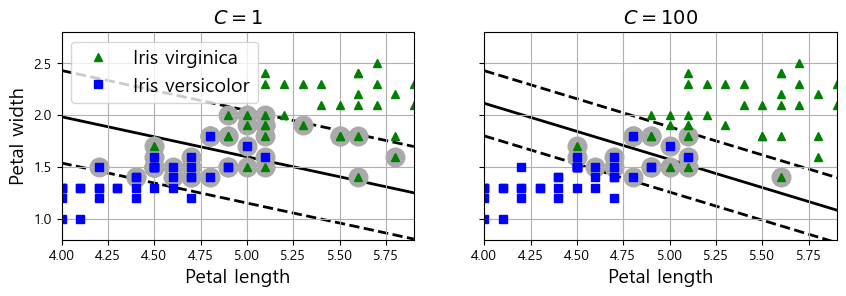

In [6]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일링되지 않은 파라미터로 변환
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기(LinearSVC는 이 작업을 자동으로 수행하지 않음)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

# 2. 비선형 SVM 분류

## 0) 다항분류로 비선형 데이터 분류하기 
- 비선형 데이터를 다루는 방법은 : 다항 특성과 같은 특성을 더 추가하는 것 -> 선형적으로 구분되는 데이터셋을 만들 수 있음 
    - 선형적으로 구분하지 못하던 데이터에 $x_2=(x_1)^2$를 추가하여 2차원 데이터 셋으로 만듦 
    - 선형적으로 구분 가능 

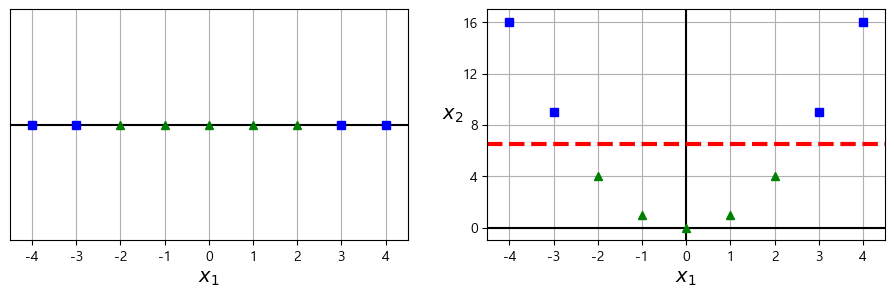

In [9]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

### PolynominalFeature를 이용해 다항식으로 만들기 
- `moons` 데이터 셋 이용 

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

#훈련 데이터 셋과 테스트 데이터 셋 만들기 
### 노이즈 0.15 , 샘플 100개 
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

### 파이프 라인 마늘기 
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3), ### 3차항으로 만듦
    StandardScaler(), ### 정규화
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

###
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

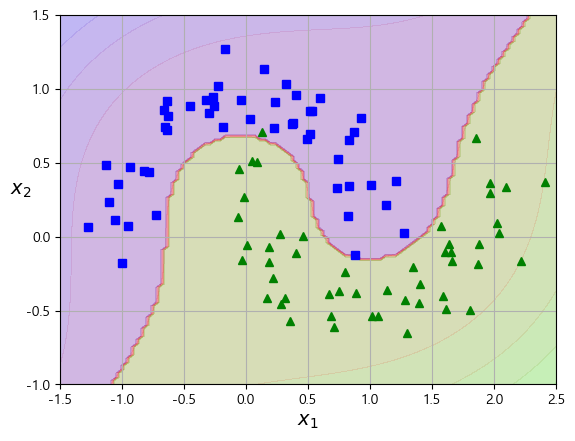

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## 1) 다항식 커널 

### 다항 특성 추가의 문제 
- 낮은 다항식은 복잡한 데이터 셋 표현을 못함 
- 높은 다항식은 모델을 느리게 만듦 

### 커널 트릭 
- 수학적 기교를 이용해 `실제 특성`을 추가하지 않고 `매우 높은 차수의 다항 특성을 ` 많이 추가한거 같은 결과를 얻게함 
- `SVC`의 클래스에 구현 

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly",degree=3,coef0=1,C=5))

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])